In [1]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 
from pathlib import Path

In [2]:
path_to_report = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/data/Shipping details 17.4.23.xlsx'
TEST = False
DISPLAY_QR_CODES = False

In [3]:
img_folder_path = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/output_qr_codes/'
pdf_path = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/ouput_pdf/qr_codes_' + Path(path_to_report).stem.replace(" ", "_").replace(".", "_")+ '.pdf'
logo_image_path= '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/data/BD_logo_circle_transparent.png'
column_name_for_unique_ID = 'ID' # 'Name on Frame' # 'Unnamed: 2' # 'Unnamed: 2' # 'Name on Frame' # 'ID' #
column_name_for_customer_name = 'Customer Name'

In [4]:
global size_dymo_paper_width, resolution_dymo_w
size_dymo_paper_width = 6.2 #cm
resolution_dymo_h = 300 #dpi
resolution_dymo_w = 600 #dpi
url_app_0 = 'https://qr.bd-ops.com/'

In [5]:
df = pd.read_excel(path_to_report, header = 1)
df.head()

,PO Number,Customer Name,ID,Frame Type,Frame Size,Frame Color,Loups Type,Magnification,WD,Remarks
0,Repair,Anum Shereen,ECOM-105-Bespoke,UK Round,M,Royal Navy,Ergo,x3,500,not warranty
1,PO 2008,Louise Peeters,H10418,UK Round,S,Royal Navy,Ergo,x4,520,NaN
2,PO 2008,Alexia Papakonstantinou,BD16701,UK Round,S,Royal Navy,Ergo,x6,530,NaN
3,PO 2008,Leanne Houlihan,BD17067,UK Rectangular,M,Graphite,Ergo,x6,510,NaN
4,PO 2008,Taher Rashid,BD16998,UK Rectangular,M,Graphite,Ergo,x7.5,500,NaN


In [6]:
def generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path, logo = False):
    qr = qrcode.QRCode(
        version = 2, # from 1 [27x27] to 40 [177x177]
        box_size=30,
        border=1)
    qr.add_data(qr_code_message)
    qr.make()
    plt.clf()
    if logo == True:
        img = qr.make_image(image_factory=StyledPilImage, embeded_image_path= logo_image_path)
    else:
        img = qr.make_image()
    cm = 1/2.54  # centimeters in inches
    plt.figure(figsize=(size_dymo_paper_width*cm, size_dymo_paper_width*cm), dpi=resolution_dymo_w)
    im = img.convert('LA')
    im = plt.imshow(im, cmap='gray')
    xmin, xmax, ymin, ymax = plt.axis()
    im = plt.title(qr_code_title_top,fontsize=15) 
    im = plt.text(s = qr_code_title_bottom, fontsize=30, x = (xmin + xmax)/2, y = ymin - 0.15*(ymax -ymin), horizontalalignment = 'center')
    # 
    im = plt.text(s = '.', fontsize=1, x = xmin, y = ymin, color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmax, y = ymax, color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmin, y = ymin - 0.3*(ymax -ymin), color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmax, y = ymax + 0.3*(ymax -ymin), color = 'w')
    im = plt.text(s = '.', fontsize=1, x = xmin, y = ymax)
    im = plt.text(s = '.', fontsize=1, x = xmax, y = ymin)
    im = plt.text(s = '.', fontsize=1, x = xmin  - 0.3*(xmax -xmin), y = ymax)
    im = plt.text(s = '.', fontsize=1, x = xmax  + 0.3*(xmax -xmin), y = ymin)
    im = plt.axis('off')
    # 
    filename = qr_code_title_top + '_QR_code.jpg'
    # plt.tight_layout(pad=3, h_pad = 3)
    plt.rcParams["figure.figsize"] = (size_dymo_paper_width*cm, size_dymo_paper_width*cm)
    plt.savefig(img_folder_path + filename, transparent  = True, dpi = resolution_dymo_w, bbox_inches = 'tight') #   
    
    return im, filename
    

In [7]:
if TEST == True:
    img_folder_path_test = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/output_test/'
    !rm -r {img_folder_path_test+'*'}
    !rm -r {pdf_path+'*'}
    from random import randrange
    range_df = len(df[column_name_for_unique_ID])
    i = randrange(range_df)
    print(i)
    unique_id_temp = str(df[column_name_for_unique_ID].iloc[i])
    customer_name_temp = str(df[column_name_for_customer_name].iloc[i])
    qr_code_message = url_app_0 + '/' + str(unique_id_temp)
    qr_code_title_top = customer_name_temp
    qr_code_title_bottom = unique_id_temp
    # 
    im, filename = generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path_test, logo = False)
    #
    # Test CRM Order BD17110
    unique_id_temp = 'BD17110'
    qr_code_message = url_app_0 + '/' + str(unique_id_temp)
    qr_code_title_top = unique_id_temp
    qr_code_title_bottom = 'Test QR Code'
    #
    im, filename = generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path_test, logo = False)
    #

In [8]:
# stop!

/var/folders/tl/yx271fpd4sd_d224zzcb65840000gp/T/ipykernel_43968/3400480457.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(size_dymo_paper_width*cm, size_dymo_paper_width*cm), dpi=resolution_dymo_w)


<Figure size 640x480 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

<Figure size 1464.57x1464.57 with 0 Axes>

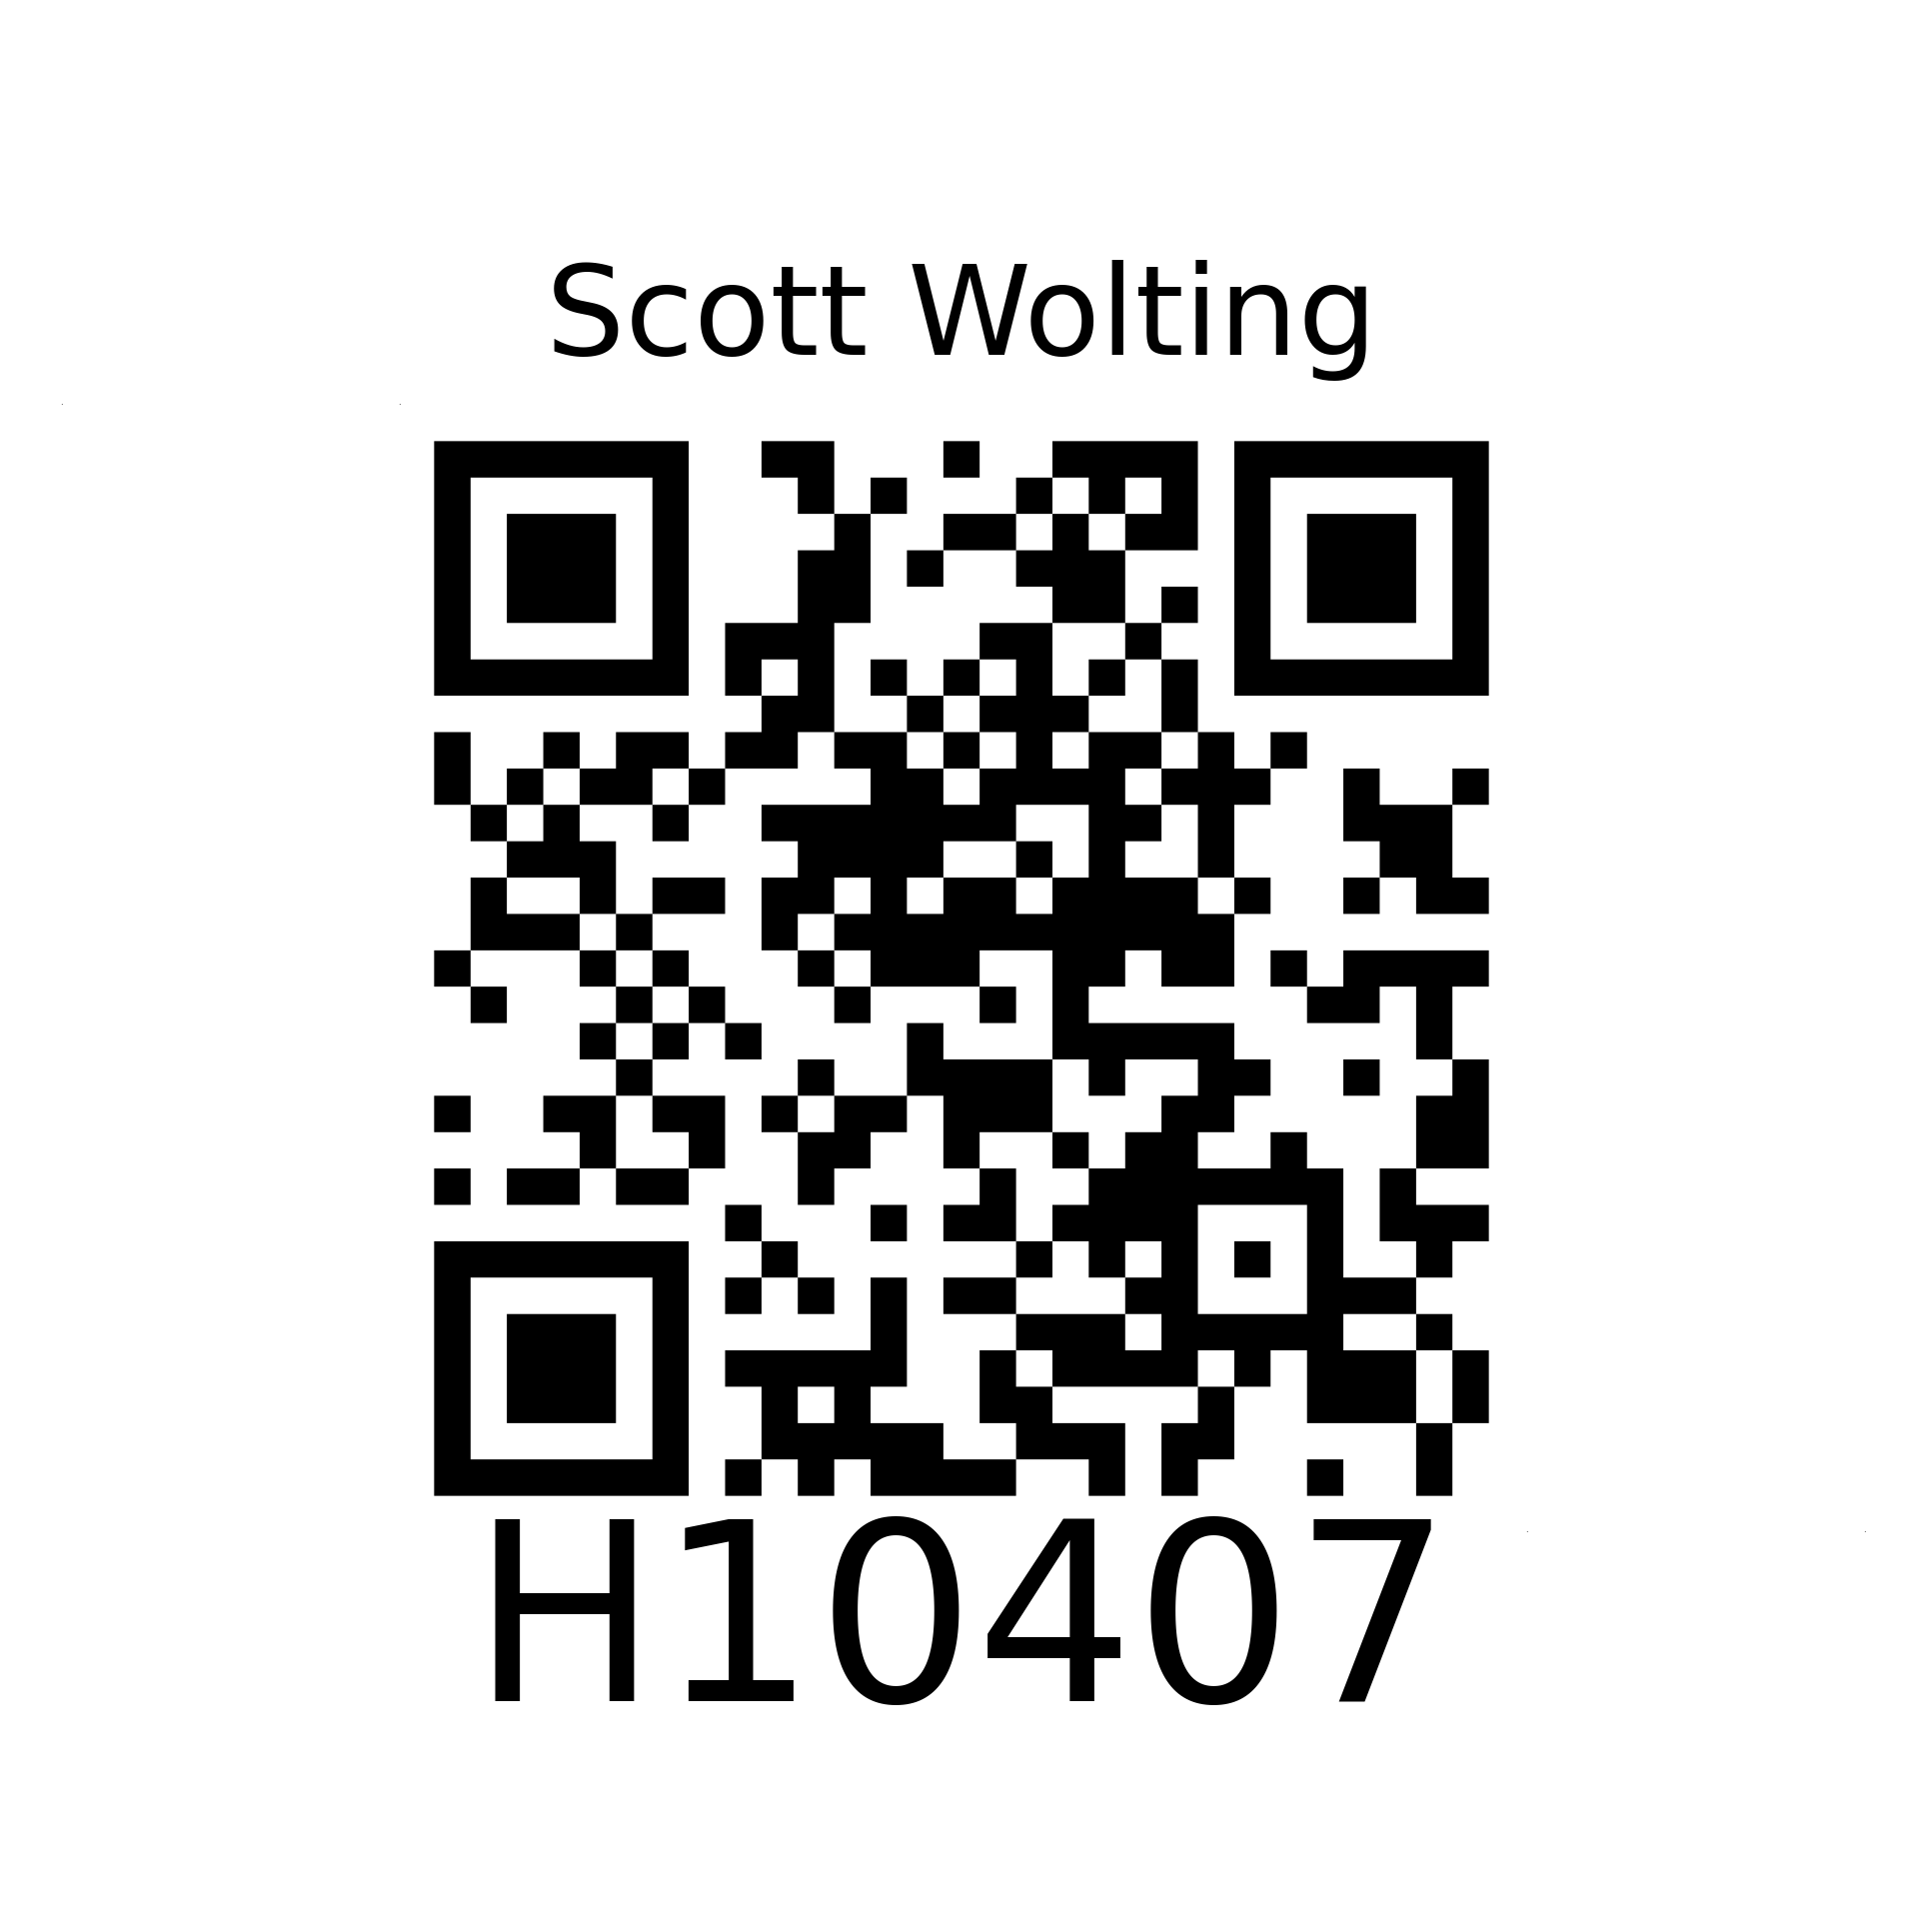

In [9]:
file_name_list = []
!rm -r {img_folder_path+'*'}
for i in range(len(df)):
    unique_id_temp = str(df[column_name_for_unique_ID].iloc[i])
    customer_name_temp = str(df[column_name_for_customer_name].iloc[i])
    if len(unique_id_temp) > 2:
        qr_code_message = url_app_0 + '/' + unique_id_temp
        qr_code_title_top = customer_name_temp
        qr_code_title_bottom = unique_id_temp
        # 
        im, filename = generate_qr_code(qr_code_message, qr_code_title_top, qr_code_title_bottom, img_folder_path, logo = False)
        file_name_list.append(filename)
        if DISPLAY_QR_CODES == True:
            plt.show()

In [10]:
!rm -r {pdf_path+'*'}
images = [Image.open(img_folder_path + f) for f in file_name_list]
images[0].save(pdf_path, "PDF" ,resolution=resolution_dymo_w, save_all=True, append_images=images[1:])

zsh:1: no matches found: /Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/QR_Code/ouput_pdf/qr_codes_Shipping_details_17_4_23.pdf*
